<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [240]:
"""
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('data_train[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('data_test[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
"""

"\nimport csv\n\nwith open('data_train.csv', newline='') as myfile:\n    reader  = csv.reader(myfile, delimiter=',')\n    ct = 1 \n    for i in reader:\n        # print('data_train[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])\n        ct += 1\n\nwith open('data_test.csv', newline='') as myfile:\n    reader  = csv.reader(myfile, delimiter=',')\n    ct = 1 \n    for i in reader:\n        # print('data_test[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])\n        ct += 1\n"

In [241]:
import pandas as pd
df = pd.read_csv("data_train.csv", names = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


In [242]:
X = df[['A','B','C']]
h = df['D']

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
transformer.fit(X)
X = transformer.transform(X)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

x = X[:, 0] 
y = X[:, 1]
z = X[:, 2]

[[-1.72189047e+00 -1.83657591e+00 -1.51486425e+00]
 [-1.66274133e+00 -1.67768253e+00 -1.94708802e+00]
 [-1.72469938e+00 -1.77069970e+00 -1.65070162e+00]
 [-1.68989982e+00 -1.72480884e+00 -1.75333838e+00]
 [-1.71003100e+00 -1.80112146e+00 -1.91179084e+00]
 [-1.71950215e+00 -1.76682843e+00 -1.75792587e+00]
 [-1.70623252e+00 -1.62420387e+00 -1.70211297e+00]
 [-1.65154898e+00 -1.54096157e+00 -1.52423558e+00]
 [-1.64429462e+00 -1.53121630e+00 -1.86818620e+00]
 [-1.58879520e+00 -1.61475343e+00 -1.62637525e+00]
 [-1.64516320e+00 -1.72400765e+00 -1.61611624e+00]
 [-1.55605332e+00 -1.59169132e+00 -1.48978237e+00]
 [-1.58739317e+00 -1.60546691e+00 -1.53975241e+00]
 [-1.54574635e+00 -1.60104809e+00 -1.53161425e+00]
 [-1.55272265e+00 -1.50846062e+00 -1.69581445e+00]
 [-1.55701721e+00 -1.46471003e+00 -1.55788014e+00]
 [-1.50818336e+00 -1.47811433e+00 -1.51442540e+00]
 [-1.51606322e+00 -1.65090147e+00 -1.59829889e+00]
 [-1.49490424e+00 -1.50588317e+00 -1.48356557e+00]
 [-1.52513045e+00 -1.51570449e+

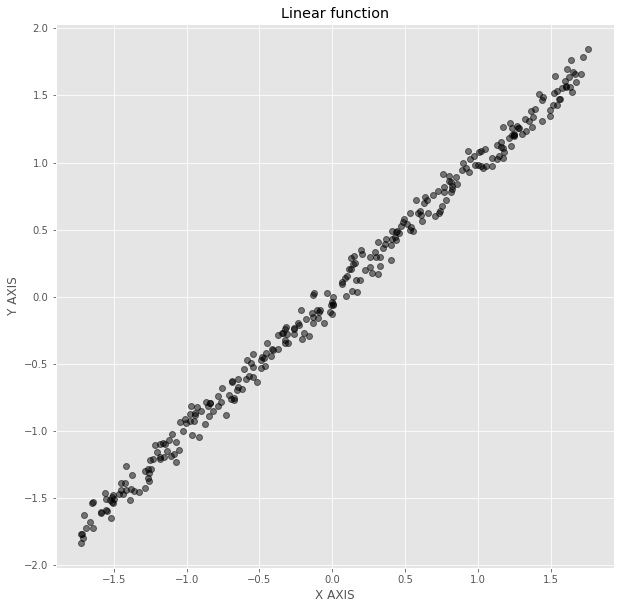

'for i in range(300):\n  np.round(x[i],6)\n  np.round(y[i],6)\n  np.round(z[i],6)'

In [243]:
"""import csv

x_train = []
y_train = []
z_train = []
h_train = []

x_test = []
y_test = []
z_test = []
h_test = []


with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        x_train.append(i[0])
        y_train.append(i[1])
        z_train.append(i[2])
        h_train.append(i[3])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        x_test.append(i[0])
        y_test.append(i[1])
        z_test.append(i[2])
        h_test.append(i[3])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

x_train = np.array(x_train)
y_train = np.array(y_train)
z_train = np.array(z_train)
h_train = np.array(h_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
z_test = np.array(z_test)
h_test = np.array(h_test)
"""
"""
path = "data_train.csv"
data = np.genfromtxt(path, delimiter=',')

x_train = data[:, 0]
y_train = data[:, 1]
z_train = data[:, 2]
h_train = data[:, 3]
"""
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
y_train = sc.fit_transform(y_train)
z_train = sc.fit_transform(z_train)
"""

plt.figure(figsize=(10, 10)) # 그래프 사이즈 조절
plt.title('Linear function')
plt.xlabel('X AXIS')
plt.ylabel('Y AXIS')
plt.plot(x, y, 'o', c = 'black', alpha = 0.5)
plt.show()

#x.round(5)
#y.round(5)
#z.round(5)
#h.round(5)
"""for i in range(300):
  np.round(x[i],6)
  np.round(y[i],6)
  np.round(z[i],6)"""

In [0]:
thetaZero = 0.0
thetaOne = 0.0
thetaTwo = 0.0
thetaThree = 0.0

cycle = 4000
learningLate = 1.1

* 세타값 초기화(learning 시작점)
* Optimization cycle과 learning late 설정

In [245]:
iForGraph = []

newThetaOne = []
newThetaZero = []
newThetaTwo = []
newThetaThree = []

noiseNum = len(x)
print(noiseNum)

300


* Plotting을 위한 각종 데이터 저장 변수 정의

In [246]:
for i in range(cycle):

  f = thetaZero + thetaOne * x + thetaTwo * y + thetaThree * z
  j = np.sum((f - h) ** 2) / (2 * noiseNum)

  thetaZero = thetaZero - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero))
  thetaOne = thetaOne - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*x)
  thetaTwo = thetaTwo - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*y)
  thetaThree = thetaThree - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*z)
  
  iForGraph.append(i)
  
  newThetaZero.append(thetaZero)
  newThetaOne.append(thetaOne)
  newThetaTwo.append(thetaTwo)
  newThetaThree.append(thetaThree)
  
  if i % 100 == 0:
        print('cycle : {:10d} cost: {:10f} thetaZero: {:10f} thetaOne: {:10f} thetaTwo: {:10f} thetaThree: {:10f}'.format(i, j, thetaZero, thetaOne, thetaTwo, thetaThree))

finalY = thetaZero + thetaOne * x + thetaTwo * y + thetaThree * z

cycle :          0 cost: 135990.528423 thetaZero: 495.376232 thetaOne: 284.767898 thetaTwo: -28.705472 thetaThree:   9.069348
cycle :        100 cost: 141.023675 thetaZero: 450.342029 thetaOne:   0.541998 thetaTwo: -47.284199 thetaThree: 308.629032
cycle :        200 cost: 115.070616 thetaZero: 450.342029 thetaOne:  -1.780748 thetaTwo: -94.555351 thetaThree: 357.669265
cycle :        300 cost: 107.461283 thetaZero: 450.342029 thetaOne:  27.624500 thetaTwo: -125.081618 thetaThree: 358.733716
cycle :        400 cost: 104.502971 thetaZero: 450.342029 thetaOne:  48.131212 thetaTwo: -140.944769 thetaThree: 354.111654
cycle :        500 cost: 103.692291 thetaZero: 450.342029 thetaOne:  59.044288 thetaTwo: -148.537145 thetaThree: 350.811938
cycle :        600 cost: 103.504306 thetaZero: 450.342029 thetaOne:  64.321404 thetaTwo: -152.034185 thetaThree: 349.043967
cycle :        700 cost: 103.464133 thetaZero: 450.342029 thetaOne:  66.764343 thetaTwo: -153.613705 thetaThree: 348.186595
cycle : 

* Gradient descent algorithm(multiple linear regression)
* list.append 함수를 사용하여 optimization 단계마다 각각의 값 저장
* 100cycle 주기로 출력
* Optimal한 linear함수 finalY 정의

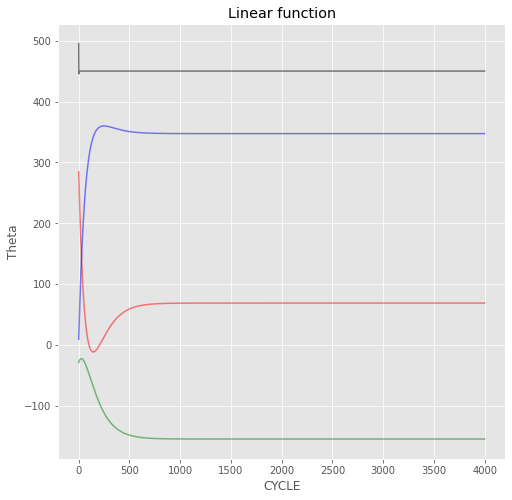

In [247]:
plt.figure(figsize=(8, 8)) # 그래프 사이즈 조절
plt.title('Linear function')
plt.xlabel('CYCLE')
plt.ylabel('Theta')
plt.plot(iForGraph, newThetaZero, c = 'black', alpha = 0.5)
plt.plot(iForGraph, newThetaOne, c = 'red', alpha = 0.5)
plt.plot(iForGraph, newThetaTwo, c = 'green', alpha = 0.5)
plt.plot(iForGraph, newThetaThree, c = 'blue', alpha = 0.5)
plt.show()